In [1]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Model
from keras import backend as K
from keras.engine.topology import Layer
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Multiply, Permute, Embedding, Bidirectional, Merge
from keras.preprocessing import sequence
from keras.datasets import imdb

from LayerNormalizationRNN import LSTM



from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings

from keras import initializers
from keras import regularizers
from keras import constraints
from keras.engine import Layer
from keras.engine import InputSpec
from keras.utils.generic_utils import has_arg
from keras.layers.recurrent import RNN
from keras import activations

# Legacy support.
from keras.legacy.layers import Recurrent
from keras.legacy import interfaces

from keras import backend as K

In [5]:
max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 128
INDEX_FROM = 3

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features, index_from = INDEX_FROM)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [4]:
K.get_session().close()
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

In [7]:
inputs = Input(shape=(maxlen,))
x = Embedding(max_features, 128)(inputs)

x = LSTM(64)(x)

predictions = Dense(1, activation='sigmoid')(x)


model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])





inputs = Input(shape=(maxlen,))
x = Embedding(max_features, 128)(inputs)

x = LSTM(64, layer_to_normalize=("input"))(x)

predictions = Dense(1, activation='sigmoid')(x)


model_i = Model(inputs=inputs, outputs=predictions)
model_i.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])





inputs = Input(shape=(maxlen,))
x = Embedding(max_features, 128)(inputs)

x = LSTM(64, layer_to_normalize=("output"))(x)

predictions = Dense(1, activation='sigmoid')(x)


model_o = Model(inputs=inputs, outputs=predictions)
model_o.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


inputs = Input(shape=(maxlen,))
x = Embedding(max_features, 128)(inputs)

x = LSTM(64, layer_to_normalize=("recurrent"))(x)

predictions = Dense(1, activation='sigmoid')(x)


model_r = Model(inputs=inputs, outputs=predictions)
model_r.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



inputs = Input(shape=(maxlen,))
x = Embedding(max_features, 128)(inputs)

x = LSTM(64, layer_to_normalize=("output", "input"))(x)

predictions = Dense(1, activation='sigmoid')(x)


model_io = Model(inputs=inputs, outputs=predictions)
model_io.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



inputs = Input(shape=(maxlen,))
x = Embedding(max_features, 128)(inputs)

x = LSTM(64, layer_to_normalize=("output", "input", "recurrent"))(x)

predictions = Dense(1, activation='sigmoid')(x)


model_ior = Model(inputs=inputs, outputs=predictions)
model_ior.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [8]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))

history_i = model_i.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))

history_o = model_o.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))

history_r = model_r.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))

history_io = model_io.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))

history_ior = model_ior.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 32s 1ms/step - loss: 0.4533 - acc: 0.7870 - val_loss: 0.3552 - val_acc: 0.8427
Epoch 2/5
25000/25000 [==============================] - 31s 1ms/step - loss: 0.2939 - acc: 0.8804 - val_loss: 0.4112 - val_acc: 0.8328
Epoch 3/5
25000/25000 [==============================] - 31s 1ms/step - loss: 0.2396 - acc: 0.9046 - val_loss: 0.3995 - val_acc: 0.8369
Epoch 4/5
25000/25000 [==============================] - 30s 1ms/step - loss: 0.2027 - acc: 0.9231 - val_loss: 0.3708 - val_acc: 0.8386
Epoch 5/5
25000/25000 [==============================] - 29s 1ms/step - loss: 0.1730 - acc: 0.9346 - val_loss: 0.6550 - val_acc: 0.7888
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 108s 4ms/step - loss: 0.6319 - acc: 0.6408 - val_loss: 0.5547 - val_acc: 0.7141
Epoch 2/5
25000/25000 [==============================] - 106s 4ms/step - loss: 0.39

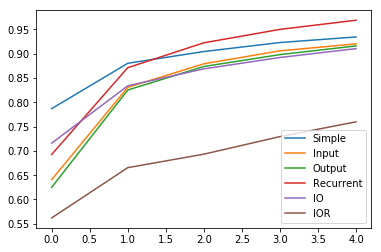

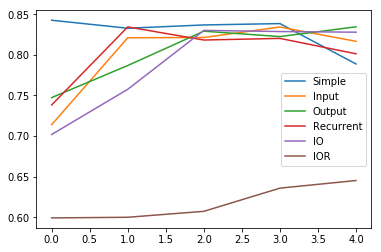

In [9]:
plt.plot(history.history["acc"], label="Simple")
plt.plot(history_i.history["acc"], label="Input")
plt.plot(history_o.history["acc"], label="Output")
plt.plot(history_r.history["acc"], label="Recurrent")
plt.plot(history_io.history["acc"], label="IO")
plt.plot(history_ior.history["acc"], label="IOR")
plt.legend()
plt.show()

plt.plot(history.history["val_acc"], label="Simple")
plt.plot(history_i.history["val_acc"], label="Input")
plt.plot(history_o.history["val_acc"], label="Output")
plt.plot(history_r.history["val_acc"], label="Recurrent")
plt.plot(history_io.history["val_acc"], label="IO")
plt.plot(history_ior.history["val_acc"], label="IOR")
plt.legend()
plt.show()

In [22]:
class GRU(RNN):
    """Gated Recurrent Unit - Cho et al. 2014.
    There are two variants. The default one is based on 1406.1078v3 and
    has reset gate applied to hidden state before matrix multiplication. The
    other one is based on original 1406.1078v1 and has the order reversed.
    The second variant is compatible with CuDNNGRU (GPU-only) and allows
    inference on CPU. Thus it has separate biases for `kernel` and
    `recurrent_kernel`. Use `'reset_after'=True` and
    `recurrent_activation='sigmoid'`.
    # Arguments
        units: Positive integer, dimensionality of the output space.
        activation: Activation function to use
            (see [activations](../activations.md)).
            Default: hyperbolic tangent (`tanh`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        recurrent_activation: Activation function to use
            for the recurrent step
            (see [activations](../activations.md)).
            Default: hard sigmoid (`hard_sigmoid`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        use_bias: Boolean, whether the layer uses a bias vector.
        kernel_initializer: Initializer for the `kernel` weights matrix,
            used for the linear transformation of the inputs
            (see [initializers](../initializers.md)).
        recurrent_initializer: Initializer for the `recurrent_kernel`
            weights matrix,
            used for the linear transformation of the recurrent state
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        recurrent_regularizer: Regularizer function applied to
            the `recurrent_kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        activity_regularizer: Regularizer function applied to
            the output of the layer (its "activation").
            (see [regularizer](../regularizers.md)).
        kernel_constraint: Constraint function applied to
            the `kernel` weights matrix
            (see [constraints](../constraints.md)).
        recurrent_constraint: Constraint function applied to
            the `recurrent_kernel` weights matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
        dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the inputs.
        recurrent_dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the recurrent state.
        implementation: Implementation mode, either 1 or 2.
            Mode 1 will structure its operations as a larger number of
            smaller dot products and additions, whereas mode 2 will
            batch them into fewer, larger operations. These modes will
            have different performance profiles on different hardware and
            for different applications.
        return_sequences: Boolean. Whether to return the last output
            in the output sequence, or the full sequence.
        return_state: Boolean. Whether to return the last state
            in addition to the output.
        go_backwards: Boolean (default False).
            If True, process the input sequence backwards and return the
            reversed sequence.
        stateful: Boolean (default False). If True, the last state
            for each sample at index i in a batch will be used as initial
            state for the sample of index i in the following batch.
        unroll: Boolean (default False).
            If True, the network will be unrolled,
            else a symbolic loop will be used.
            Unrolling can speed-up a RNN,
            although it tends to be more memory-intensive.
            Unrolling is only suitable for short sequences.
        reset_after: GRU convention (whether to apply reset gate after or
            before matrix multiplication). False = "before" (default),
            True = "after" (CuDNN compatible).
        normalize_layer_seperately: Boolean. Whether the mean and std are 
            calculated over all gates jointly, or seperately
        layer_to_normalize: List which connections should be normalized. 
            Options: "input_gate", "input_recurrent", "recurrent_gate" and "recurrent_recurrent"
    # References
        - [Learning Phrase Representations using RNN Encoder-Decoder for Statistical Machine Translation](https://arxiv.org/abs/1406.1078)
        - [On the Properties of Neural Machine Translation: Encoder-Decoder Approaches](https://arxiv.org/abs/1409.1259)
        - [Empirical Evaluation of Gated Recurrent Neural Networks on Sequence Modeling](http://arxiv.org/abs/1412.3555v1)
        - [A Theoretically Grounded Application of Dropout in Recurrent Neural Networks](http://arxiv.org/abs/1512.05287)
    """

    @interfaces.legacy_recurrent_support
    def __init__(self, units,
                 activation='tanh',
                 recurrent_activation='hard_sigmoid',
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='orthogonal',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 recurrent_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 recurrent_constraint=None,
                 bias_constraint=None,
                 dropout=0.,
                 recurrent_dropout=0.,
                 implementation=1,
                 return_sequences=False,
                 return_state=False,
                 go_backwards=False,
                 stateful=False,
                 unroll=False,
                 reset_after=False,
                 layer_to_normalize=(),
                 normalize_seperately=False,
                 **kwargs):
        if implementation == 0:
            warnings.warn('`implementation=0` has been deprecated, '
                          'and now defaults to `implementation=1`.'
                          'Please update your layer call.')
        if K.backend() == 'theano' and (dropout or recurrent_dropout):
            warnings.warn(
                'RNN dropout is no longer supported with the Theano backend '
                'due to technical limitations. '
                'You can either set `dropout` and `recurrent_dropout` to 0, '
                'or use the TensorFlow backend.')
            dropout = 0.
            recurrent_dropout = 0.

        cell = GRUCell(units,
                       activation=activation,
                       recurrent_activation=recurrent_activation,
                       use_bias=use_bias,
                       kernel_initializer=kernel_initializer,
                       recurrent_initializer=recurrent_initializer,
                       bias_initializer=bias_initializer,
                       kernel_regularizer=kernel_regularizer,
                       recurrent_regularizer=recurrent_regularizer,
                       bias_regularizer=bias_regularizer,
                       kernel_constraint=kernel_constraint,
                       recurrent_constraint=recurrent_constraint,
                       bias_constraint=bias_constraint,
                       dropout=dropout,
                       recurrent_dropout=recurrent_dropout,
                       implementation=implementation,
                       layer_to_normalize=layer_to_normalize,
                       normalize_seperately=normalize_seperately,
                       reset_after=reset_after)
        super(GRU, self).__init__(cell,
                                  return_sequences=return_sequences,
                                  return_state=return_state,
                                  go_backwards=go_backwards,
                                  stateful=stateful,
                                  unroll=unroll,
                                  **kwargs)
        self.activity_regularizer = regularizers.get(activity_regularizer)

    def call(self, inputs, mask=None, training=None, initial_state=None):
        self.cell._dropout_mask = None
        self.cell._recurrent_dropout_mask = None
        return super(GRU, self).call(inputs,
                                     mask=mask,
                                     training=training,
                                     initial_state=initial_state)

    @property
    def units(self):
        return self.cell.units

    @property
    def activation(self):
        return self.cell.activation

    @property
    def recurrent_activation(self):
        return self.cell.recurrent_activation

    @property
    def use_bias(self):
        return self.cell.use_bias

    @property
    def kernel_initializer(self):
        return self.cell.kernel_initializer

    @property
    def recurrent_initializer(self):
        return self.cell.recurrent_initializer

    @property
    def bias_initializer(self):
        return self.cell.bias_initializer

    @property
    def kernel_regularizer(self):
        return self.cell.kernel_regularizer

    @property
    def recurrent_regularizer(self):
        return self.cell.recurrent_regularizer

    @property
    def bias_regularizer(self):
        return self.cell.bias_regularizer

    @property
    def kernel_constraint(self):
        return self.cell.kernel_constraint

    @property
    def recurrent_constraint(self):
        return self.cell.recurrent_constraint

    @property
    def bias_constraint(self):
        return self.cell.bias_constraint

    @property
    def dropout(self):
        return self.cell.dropout

    @property
    def recurrent_dropout(self):
        return self.cell.recurrent_dropout

    @property
    def implementation(self):
        return self.cell.implementation

    @property
    def reset_after(self):
        return self.cell.reset_after
    
    @property
    def layer_to_normalize(self):
        return self.cell.layer_to_normalize
    
    @property
    def normalize_seperately(self):
        return self.cell.normalize_seperately

    def get_config(self):
        config = {'units': self.units,
                  'activation': activations.serialize(self.activation),
                  'recurrent_activation': activations.serialize(self.recurrent_activation),
                  'use_bias': self.use_bias,
                  'kernel_initializer': initializers.serialize(self.kernel_initializer),
                  'recurrent_initializer': initializers.serialize(self.recurrent_initializer),
                  'bias_initializer': initializers.serialize(self.bias_initializer),
                  'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
                  'recurrent_regularizer': regularizers.serialize(self.recurrent_regularizer),
                  'bias_regularizer': regularizers.serialize(self.bias_regularizer),
                  'activity_regularizer': regularizers.serialize(self.activity_regularizer),
                  'kernel_constraint': constraints.serialize(self.kernel_constraint),
                  'recurrent_constraint': constraints.serialize(self.recurrent_constraint),
                  'bias_constraint': constraints.serialize(self.bias_constraint),
                  'dropout': self.dropout,
                  'recurrent_dropout': self.recurrent_dropout,
                  'implementation': self.implementation,
                  'layer_to_normalize':layer_to_normalize,
                  'normalize_seperately':normalize_seperately,
                  'reset_after': self.reset_after}
        base_config = super(GRU, self).get_config()
        del base_config['cell']
        return dict(list(base_config.items()) + list(config.items()))

    @classmethod
    def from_config(cls, config):
        if 'implementation' in config and config['implementation'] == 0:
            config['implementation'] = 1
        return cls(**config)



class GRUCell(Layer):
    """Cell class for the GRU layer.
    # Arguments
        units: Positive integer, dimensionality of the output space.
        activation: Activation function to use
            (see [activations](../activations.md)).
            Default: hyperbolic tangent (`tanh`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        recurrent_activation: Activation function to use
            for the recurrent step
            (see [activations](../activations.md)).
            Default: hard sigmoid (`hard_sigmoid`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        use_bias: Boolean, whether the layer uses a bias vector.
        kernel_initializer: Initializer for the `kernel` weights matrix,
            used for the linear transformation of the inputs
            (see [initializers](../initializers.md)).
        recurrent_initializer: Initializer for the `recurrent_kernel`
            weights matrix,
            used for the linear transformation of the recurrent state
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        recurrent_regularizer: Regularizer function applied to
            the `recurrent_kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        kernel_constraint: Constraint function applied to
            the `kernel` weights matrix
            (see [constraints](../constraints.md)).
        recurrent_constraint: Constraint function applied to
            the `recurrent_kernel` weights matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
        dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the inputs.
        recurrent_dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the recurrent state.
        implementation: Implementation mode, either 1 or 2.
            Mode 1 will structure its operations as a larger number of
            smaller dot products and additions, whereas mode 2 will
            batch them into fewer, larger operations. These modes will
            have different performance profiles on different hardware and
            for different applications.
        reset_after: GRU convention (whether to apply reset gate after or
            before matrix multiplication). False = "before" (default),
            True = "after" (CuDNN compatible).
        normalize_layer_seperately: Boolean. Whether the mean and std are 
            calculated over all gates jointly, or seperately
        layer_to_normalize: List which connections should be normalized. 
            Options: "input_gate", "input_recurrent", "recurrent_gate" and "recurrent_recurrent"
    """

    def __init__(self, units,
                 activation='tanh',
                 recurrent_activation='hard_sigmoid',
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='orthogonal',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 recurrent_regularizer=None,
                 bias_regularizer=None,
                 kernel_constraint=None,
                 recurrent_constraint=None,
                 bias_constraint=None,
                 dropout=0.,
                 recurrent_dropout=0.,
                 implementation=1,
                 reset_after=False,
                 layer_to_normalize=(),
                 normalize_seperately=False,
                 **kwargs):
        super(GRUCell, self).__init__(**kwargs)
        self.units = units
        self.activation = activations.get(activation)
        self.recurrent_activation = activations.get(recurrent_activation)
        self.use_bias = use_bias

        self.kernel_initializer = initializers.get(kernel_initializer)
        self.recurrent_initializer = initializers.get(recurrent_initializer)
        self.bias_initializer = initializers.get(bias_initializer)

        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.recurrent_regularizer = regularizers.get(recurrent_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)

        self.kernel_constraint = constraints.get(kernel_constraint)
        self.recurrent_constraint = constraints.get(recurrent_constraint)
        self.bias_constraint = constraints.get(bias_constraint)

        self.dropout = min(1., max(0., dropout))
        self.recurrent_dropout = min(1., max(0., recurrent_dropout))
        self.implementation = implementation
        self.reset_after = reset_after
        self.state_size = self.units
        self._dropout_mask = None
        self._recurrent_dropout_mask = None
        self.layer_to_normalize=layer_to_normalize
        self.normalize_seperately=normalize_seperately

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.kernel = self.add_weight(shape=(input_dim, self.units * 3),
                                      name='kernel',
                                      initializer=self.kernel_initializer,
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units * 3),
            name='recurrent_kernel',
            initializer=self.recurrent_initializer,
            regularizer=self.recurrent_regularizer,
            constraint=self.recurrent_constraint)

        if self.use_bias:
            if not self.reset_after:
                bias_shape = (3 * self.units,)
            else:
                # separate biases for input and recurrent kernels
                # Note: the shape is intentionally different from CuDNNGRU biases
                # `(2 * 3 * self.units,)`, so that we can distinguish the classes
                # when loading and converting saved weights.
                bias_shape = (2, 3 * self.units)
            self.bias = self.add_weight(shape=bias_shape,
                                        name='bias',
                                        initializer=self.bias_initializer,
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
            if not self.reset_after:
                self.input_bias, self.recurrent_bias = self.bias, None
            else:
                # NOTE: need to flatten, since slicing in CNTK gives 2D array
                self.input_bias = K.flatten(self.bias[0])
                self.recurrent_bias = K.flatten(self.bias[1])
        else:
            self.bias = None

        # update gate
        self.kernel_z = self.kernel[:, :self.units]
        self.recurrent_kernel_z = self.recurrent_kernel[:, :self.units]
        # reset gate
        self.kernel_r = self.kernel[:, self.units: self.units * 2]
        self.recurrent_kernel_r = self.recurrent_kernel[:,
                                                        self.units:
                                                        self.units * 2]
        # new gate
        self.kernel_h = self.kernel[:, self.units * 2:]
        self.recurrent_kernel_h = self.recurrent_kernel[:, self.units * 2:]

        if self.use_bias:
            # bias for inputs
            self.input_bias_z = self.input_bias[:self.units]
            self.input_bias_r = self.input_bias[self.units: self.units * 2]
            self.input_bias_h = self.input_bias[self.units * 2:]
            # bias for hidden state - just for compatibility with CuDNN
            if self.reset_after:
                self.recurrent_bias_z = self.recurrent_bias[:self.units]
                self.recurrent_bias_r = self.recurrent_bias[self.units: self.units * 2]
                self.recurrent_bias_h = self.recurrent_bias[self.units * 2:]
        else:
            self.input_bias_z = None
            self.input_bias_r = None
            self.input_bias_h = None
            if self.reset_after:
                self.recurrent_bias_z = None
                self.recurrent_bias_r = None
                self.recurrent_bias_h = None
        self.built = True
        
        
        if "input_gate" in self.layer_to_normalize:
            self.ln_gain1 = self.add_weight(shape=(2*self.units,),
                                            name='ln_gain1',
                                            initializer= "zeros")
            self.ln_bias1 = self.add_weight(shape=(2*self.units,),
                                            name='ln_bias1',
                                            initializer= "ones")
        if "input_recurrent" in self.layer_to_normalize:
            self.ln_gain2 = self.add_weight(shape=(self.units,),
                                            name='ln_gain2',
                                            initializer= "zeros")
            self.ln_bias2 = self.add_weight(shape=(self.units,),
                                            name='ln_bias2',
                                            initializer= "ones")
        if "recurrent_gate" in self.layer_to_normalize:
            self.ln_gain3 = self.add_weight(shape=(2*self.units,),
                                          name='ln_gain3',
                                          initializer= "zeros")
            self.ln_bias3 = self.add_weight(shape=(2*self.units,),
                                          name='ln_bias3',
                                          initializer= "ones")       
        if "recurrent_recurrent" in self.layer_to_normalize:
            self.ln_gain4 = self.add_weight(shape=(self.units,),
                                          name='ln_gain4',
                                          initializer= "zeros")
            self.ln_bias4 = self.add_weight(shape=(self.units,),
                                          name='ln_bias4',
                                          initializer= "ones")

        
    def normalize_layer(self, layer, gain, beta):
        m = K.mean(layer, axis=-1, keepdims=True)
        std = K.sqrt(K.var(layer, axis=-1, keepdims=True) + K.epsilon())
        layer_normed = (layer - m) / (std + K.epsilon())
        layer_normed = layer_normed * gain + beta
        return layer_normed 
        
        
        
    def call(self, inputs, states, training=None):
        h_tm1 = states[0]  # previous memory

        if 0 < self.dropout < 1 and self._dropout_mask is None:
            self._dropout_mask = _generate_dropout_mask(
                K.ones_like(inputs),
                self.dropout,
                training=training,
                count=3)
        if (0 < self.recurrent_dropout < 1 and
                self._recurrent_dropout_mask is None):
            self._recurrent_dropout_mask = _generate_dropout_mask(
                K.ones_like(h_tm1),
                self.recurrent_dropout,
                training=training,
                count=3)

        # dropout matrices for input units
        dp_mask = self._dropout_mask
        # dropout matrices for recurrent units
        rec_dp_mask = self._recurrent_dropout_mask

        if self.implementation == 1:
            if 0. < self.dropout < 1.:
                inputs_z = inputs * dp_mask[0]
                inputs_r = inputs * dp_mask[1]
                inputs_h = inputs * dp_mask[2]
            else:
                inputs_z = inputs
                inputs_r = inputs
                inputs_h = inputs

            x_z = K.dot(inputs_z, self.kernel_z)
            x_r = K.dot(inputs_r, self.kernel_r)
            x_h = K.dot(inputs_h, self.kernel_h)
            
            if self.normalize_seperately:
                if "input_gate" in self.layer_to_normalize:
                    x_z = self.normalize_layer(x_z, self.ln_gain1[:self.units], self.ln_bias1[:self.units])
                    x_r = self.normalize_layer(x_r, self.ln_gain1[self.units:], self.ln_bias1[self.units:])
            else:
                if "input_gate" in self.layer_to_normalize:
                    x_concat = K.concatenate([x_z, x_r])
                    x_concat = self.normalize_layer(x_concat, self.ln_gain1, self.ln_bias1)
                    x_z = x_concat[:, :self.units]
                    x_r = x_concat[:, self.units:]
                    
            if "input_recurrent" in self.layer_to_normalize:
                x_h = self.normalize_layer(x_h, self.ln_gain2, self.ln_bias2)
            
            
            
            if self.use_bias:
                x_z = K.bias_add(x_z, self.input_bias_z)
                x_r = K.bias_add(x_r, self.input_bias_r)
                x_h = K.bias_add(x_h, self.input_bias_h)

            if 0. < self.recurrent_dropout < 1.:
                h_tm1_z = h_tm1 * rec_dp_mask[0]
                h_tm1_r = h_tm1 * rec_dp_mask[1]
                h_tm1_h = h_tm1 * rec_dp_mask[2]
            else:
                h_tm1_z = h_tm1
                h_tm1_r = h_tm1
                h_tm1_h = h_tm1

            recurrent_z = K.dot(h_tm1_z, self.recurrent_kernel_z)
            recurrent_r = K.dot(h_tm1_r, self.recurrent_kernel_r)
            
            if self.normalize_seperately:
                if "recurrent_gate" in self.layer_to_normalize:
                    recurrent_z = self.normalize_layer(recurrent_z, self.ln_gain3[:self.units], self.ln_bias3[:self.units])
                    recurrent_r = self.normalize_layer(recurrent_r, self.ln_gain3[self.units:], self.ln_bias3[self.units:])
            else:
                if "recurrent_gate" in self.layer_to_normalize:
                    recurrent_concat = K.concatenate([recurrent_z, recurrent_r])
                    recurrent_concat = self.normalize_layer(recurrent_concat, self.ln_gain3, self.ln_bias3)
                    recurrent_z = recurrent_concat[:, :self.units]
                    recurrent_r = recurrent_concat[:, self.units:]
            
            if self.reset_after and self.use_bias:
                recurrent_z = K.bias_add(recurrent_z, self.recurrent_bias_z)
                recurrent_r = K.bias_add(recurrent_r, self.recurrent_bias_r)

            z = self.recurrent_activation(x_z + recurrent_z)
            r = self.recurrent_activation(x_r + recurrent_r)

            # reset gate applied after/before matrix multiplication
            if self.reset_after:
                recurrent_h = K.dot(h_tm1_h, self.recurrent_kernel_h)
                if "recurrent_recurrent" in self.layer_to_normalize:
                    recurrent_h = self.normalize_layer(recurrent_h, self.ln_gain4, self.ln_bias4)
                if self.use_bias:
                    recurrent_h = K.bias_add(recurrent_h, self.recurrent_bias_h)
                recurrent_h = r * recurrent_h
            else:
                recurrent_h = K.dot(r * h_tm1_h, self.recurrent_kernel_h)
                if "recurrent_recurrent" in self.layer_to_normalize:
                    recurrent_h = self.normalize_layer(recurrent_h, self.ln_gain4, self.ln_bias4)

            hh = self.activation(x_h + recurrent_h)
        else:
            if 0. < self.dropout < 1.:
                inputs *= dp_mask[0]

            # inputs projected by all gate matrices at once
            matrix_x = K.dot(inputs, self.kernel)
            if self.use_bias:
                # biases: bias_z_i, bias_r_i, bias_h_i
                matrix_x = K.bias_add(matrix_x, self.input_bias)
            x_z = matrix_x[:, :self.units]
            x_r = matrix_x[:, self.units: 2 * self.units]
            x_h = matrix_x[:, 2 * self.units:]

            if 0. < self.recurrent_dropout < 1.:
                h_tm1 *= rec_dp_mask[0]

            if self.reset_after:
                # hidden state projected by all gate matrices at once
                matrix_inner = K.dot(h_tm1, self.recurrent_kernel)
                if self.use_bias:
                    matrix_inner = K.bias_add(matrix_inner, self.recurrent_bias)
            else:
                # hidden state projected separately for update/reset and new
                matrix_inner = K.dot(h_tm1,
                                     self.recurrent_kernel[:, :2 * self.units])

            recurrent_z = matrix_inner[:, :self.units]
            recurrent_r = matrix_inner[:, self.units: 2 * self.units]

            z = self.recurrent_activation(x_z + recurrent_z)
            r = self.recurrent_activation(x_r + recurrent_r)

            if self.reset_after:
                recurrent_h = r * matrix_inner[:, 2 * self.units:]
            else:
                recurrent_h = K.dot(r * h_tm1,
                                    self.recurrent_kernel[:, 2 * self.units:])

            hh = self.activation(x_h + recurrent_h)

        # previous and candidate state mixed by update gate
        h = z * h_tm1 + (1 - z) * hh

        if 0 < self.dropout + self.recurrent_dropout:
            if training is None:
                h._uses_learning_phase = True

        return h, [h]

    def get_config(self):
        config = {'units': self.units,
                  'activation': activations.serialize(self.activation),
                  'recurrent_activation': activations.serialize(self.recurrent_activation),
                  'use_bias': self.use_bias,
                  'kernel_initializer': initializers.serialize(self.kernel_initializer),
                  'recurrent_initializer': initializers.serialize(self.recurrent_initializer),
                  'bias_initializer': initializers.serialize(self.bias_initializer),
                  'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
                  'recurrent_regularizer': regularizers.serialize(self.recurrent_regularizer),
                  'bias_regularizer': regularizers.serialize(self.bias_regularizer),
                  'kernel_constraint': constraints.serialize(self.kernel_constraint),
                  'recurrent_constraint': constraints.serialize(self.recurrent_constraint),
                  'bias_constraint': constraints.serialize(self.bias_constraint),
                  'dropout': self.dropout,
                  'recurrent_dropout': self.recurrent_dropout,
                  'implementation': self.implementation,
                  'reset_after': self.reset_after,
                  'layer_to_normalize':layer_to_normalize,
                  'normalize_seperately':normalize_seperately}
        base_config = super(GRUCell, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))




In [25]:
inputs = Input(shape=(maxlen,))
x = Embedding(max_features, 128)(inputs)

x = GRU(64, layer_to_normalize=("input_gate", "input_recurrent", "recurrent_gate", "recurrent_recurrent"), normalize_seperately=True)(x)

predictions = Dense(1, activation='sigmoid')(x)


model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 134s 5ms/step - loss: 0.6461 - acc: 0.6650 - val_loss: 0.5243 - val_acc: 0.8154
Epoch 2/5
25000/25000 [==============================] - 131s 5ms/step - loss: 0.3807 - acc: 0.8562 - val_loss: 0.4887 - val_acc: 0.7623
Epoch 3/5
25000/25000 [==============================] - 131s 5ms/step - loss: 0.2424 - acc: 0.9076 - val_loss: 0.4184 - val_acc: 0.8208
Epoch 4/5
25000/25000 [==============================] - 131s 5ms/step - loss: 0.1793 - acc: 0.9338 - val_loss: 0.4125 - val_acc: 0.8272
Epoch 5/5
25000/25000 [==============================] - 131s 5ms/step - loss: 0.1338 - acc: 0.9510 - val_loss: 0.4893 - val_acc: 0.8136
